## Minimal example with TensorFlow 2.0

In this model we will recreate our machine learning algorithm using TF2.0

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.002)

model.compile(optimizer=custom_optimizer, loss='huber_loss')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 16.1546 - 1s/epoch - 32ms/step
Epoch 2/100
32/32 - 0s - loss: 14.8690 - 82ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 13.5925 - 83ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 12.3454 - 79ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 11.1182 - 80ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 9.9410 - 151ms/epoch - 5ms/step
Epoch 7/100
32/32 - 0s - loss: 8.8053 - 176ms/epoch - 5ms/step
Epoch 8/100
32/32 - 0s - loss: 7.7164 - 152ms/epoch - 5ms/step
Epoch 9/100
32/32 - 0s - loss: 6.7295 - 83ms/epoch - 3ms/step
Epoch 10/100
32/32 - 0s - loss: 5.8865 - 71ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 5.1882 - 79ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 4.6974 - 89ms/epoch - 3ms/step
Epoch 13/100
32/32 - 0s - loss: 4.3939 - 98ms/epoch - 3ms/step
Epoch 14/100
32/32 - 0s - loss: 4.2074 - 100ms/epoch - 3ms/step
Epoch 15/100
32/32 - 0s - loss: 4.0981 - 97ms/epoch - 3ms/step
Epoch 16/100
32/32 - 0s - loss: 4.0136 - 101ms/epoch - 3

### Extract the weights and biases

In [5]:
model.layers[0].get_weights()

[array([[ 2.0033972],
        [-2.9972048]], dtype=float32),
 array([4.7622523], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0033972],
       [-2.9972048]], dtype=float32)

In [7]:
biases = model.layers[0].get_weights()[1]
biases

array([4.7622523], dtype=float32)

### Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(2)

array([[-1.304e+01],
       [ 2.914e+01],
       [ 2.408e+01],
       [ 2.020e+01],
       [ 1.642e+01],
       [ 2.647e+01],
       [-3.485e+01],
       [ 4.378e+01],
       [-3.200e-01],
       [-1.449e+01],
       [-2.588e+01],
       [ 4.127e+01],
       [ 3.092e+01],
       [-1.587e+01],
       [ 1.370e+01],
       [ 1.444e+01],
       [ 2.963e+01],
       [ 2.001e+01],
       [ 1.338e+01],
       [-2.522e+01],
       [ 5.360e+00],
       [-3.805e+01],
       [-4.480e+00],
       [-1.124e+01],
       [-2.949e+01],
       [-3.234e+01],
       [ 1.560e+01],
       [-2.007e+01],
       [-3.687e+01],
       [-1.768e+01],
       [ 6.840e+00],
       [ 3.562e+01],
       [ 3.669e+01],
       [ 2.400e-01],
       [ 4.310e+00],
       [-1.677e+01],
       [-1.585e+01],
       [ 1.884e+01],
       [ 2.178e+01],
       [-1.307e+01],
       [ 3.519e+01],
       [ 2.791e+01],
       [ 1.571e+01],
       [-1.353e+01],
       [-1.440e+01],
       [ 3.222e+01],
       [ 1.270e+01],
       [ 3.07

In [9]:
training_data['targets'].round(1)

array([[-13.1],
       [ 29.3],
       [ 24.1],
       [ 20.5],
       [ 15.9],
       [ 26.4],
       [-33.7],
       [ 43.4],
       [  0.7],
       [-14.4],
       [-25.3],
       [ 41.2],
       [ 31.8],
       [-14.7],
       [ 13.7],
       [ 14.3],
       [ 30.2],
       [ 19.4],
       [ 13.2],
       [-24.1],
       [  4.9],
       [-37.7],
       [ -3.9],
       [-11.2],
       [-28.7],
       [-32.3],
       [ 15.6],
       [-20.5],
       [-36.2],
       [-18.1],
       [  7.2],
       [ 35.3],
       [ 36.5],
       [ -0.4],
       [  3.6],
       [-17.1],
       [-15.7],
       [ 19.2],
       [ 22.1],
       [-13.4],
       [ 34.7],
       [ 28.8],
       [ 15.2],
       [-13.2],
       [-13.2],
       [ 31.5],
       [ 12.1],
       [  2.5],
       [ 42.3],
       [ 27.5],
       [-18.6],
       [-27.1],
       [ 11.5],
       [ 19. ],
       [ 49.1],
       [-16.9],
       [ 10.9],
       [ 14. ],
       [  2.2],
       [ 23.6],
       [  2.2],
       [  0.3],
       [

### Plotting the data

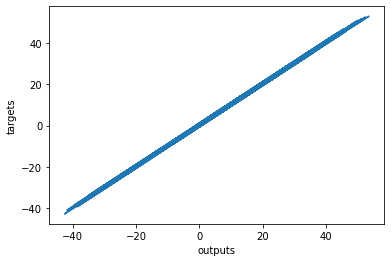

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()